In [11]:
#import statements
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.svm import SVC

In [12]:
#load the dataset
X, y = load_iris(return_X_y=True)

#reassign values to make it into binary classification of setosa and non-setosa
y[y==2]=1

#split the dataset 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# instantiate the model
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#predict y values based on the model
y_pred = logreg.predict(X_test)

#create a confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

#calculate metrics
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[16  0]
 [ 0 29]]
1.0
1.0
1.0
1.0


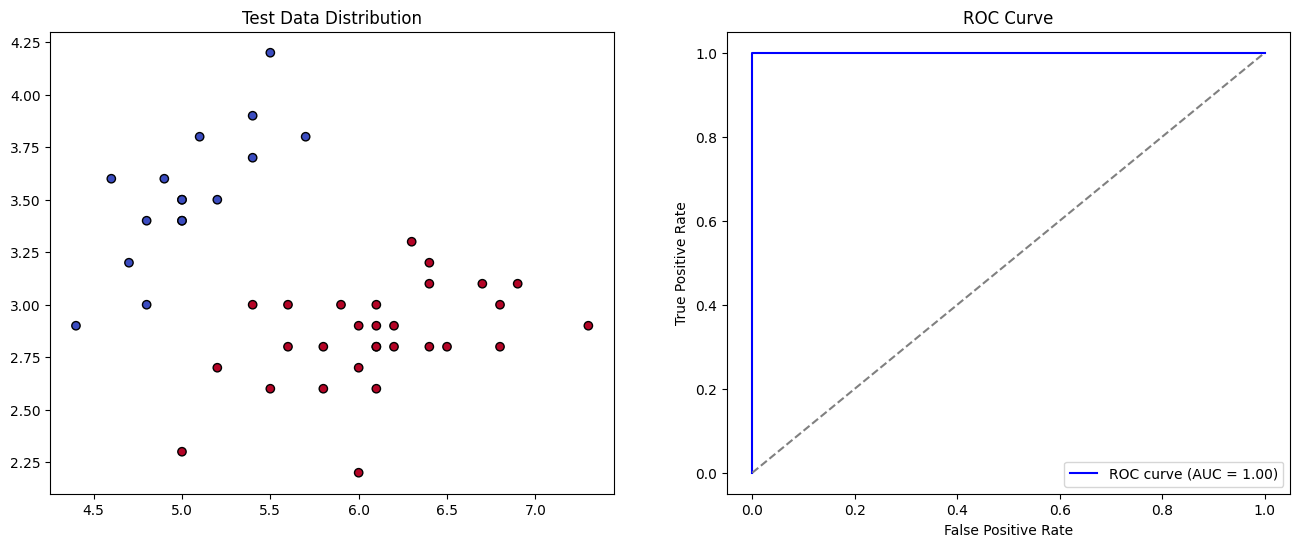

In [13]:
# Predict probabilities
y_proba = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of data
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
ax[0].set_title('Test Data Distribution')

# ROC Curve
ax[1].plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend()

plt.show()

Looking at the graph with the ROC curve, the AUC is calculated to be 1.00. This means that there was perfect classification performed by the model. AUC is number from 0 to 1, and the closer the number is to 1, the more accurate the model was.

In [14]:
#load the dataset
X, y = load_wine(return_X_y=True)

#split the data with 0.25 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
#create SVM with a linear kernel
svm_linear = SVC(kernel='linear', random_state=0)
svm_linear.fit(X_train, y_train) #fit it to the training data
y_pred_linear = svm_linear.predict(X_test) #predict y values using the model

#calculate metrics
#set average to 'macro' because balanced multiclass instead of binary
acc_linear = accuracy_score(y_test, y_pred_linear)
pre_linear = precision_score(y_test, y_pred_linear, average='macro')
rec_linear = recall_score(y_test, y_pred_linear, average='macro')
f1_linear = f1_score(y_test, y_pred_linear, average='macro')

#print metrics
print(f'Linear Accuracy: {acc_linear:.2f}')
print(f'Linear Precision: {pre_linear:.2f}')
print(f'Linear Recall: {rec_linear:.2f}')
print(f'Linear F1: {f1_linear:.2f}')

Linear Accuracy: 0.98
Linear Precision: 0.97
Linear Recall: 0.98
Linear F1: 0.98


In [16]:
#create SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=0)
svm_rbf.fit(X_train, y_train) #fit it to the training data
y_pred_rbf = svm_rbf.predict(X_test) #predict y values using the model

#calculate metrics
#set average to 'macro' because balanced multiclass instead of binary
acc_rbf = accuracy_score(y_test, y_pred_rbf)
pre_rbf = precision_score(y_test, y_pred_rbf, average='macro')
rec_rbf = recall_score(y_test, y_pred_rbf, average='macro')
f1_rbf = f1_score(y_test, y_pred_rbf, average='macro')

#print metrics
print(f'RBF Accuracy: {acc_rbf:.2f}')
print(f'RBF Precision: {pre_rbf:.2f}')
print(f'RBF Recall: {rec_rbf:.2f}')
print(f'RBF F1: {f1_rbf:.2f}')


RBF Accuracy: 0.71
RBF Precision: 0.69
RBF Recall: 0.69
RBF F1: 0.68


In [17]:
#create SVM with polynomial kernel
svm_poly = SVC(kernel='poly', random_state=0)
svm_poly.fit(X_train, y_train) #fit it to the training data
y_pred_poly = svm_poly.predict(X_test) #predict y values using the model

#calculate metrics
#set average to 'macro' because balanced multiclass instead of binary
acc_poly = accuracy_score(y_test, y_pred_poly)
pre_poly = precision_score(y_test, y_pred_poly, average='macro')
rec_poly = recall_score(y_test, y_pred_poly, average='macro')
f1_poly = f1_score(y_test, y_pred_poly, average='macro')

#print metrics
print(f'Polynomial Accuracy: {acc_poly:.2f}')
print(f'Polynomial Precision: {pre_poly:.2f}')
print(f'Polynomial Recall: {rec_poly:.2f}')
print(f'Polynomial F1: {f1_poly:.2f}')

Polynomial Accuracy: 0.76
Polynomial Precision: 0.75
Polynomial Recall: 0.70
Polynomial F1: 0.67


The SVM with the linear kernel performed the best, producing the highest values for accuracy, precision, recall, and f1-score. The SVMs with polynomial and RBF kernels performed similarly, with the polynomial kernel scoring slightly higher.